In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from dataGens import FakeAttributeSequenceGenerator
from dcgan import DCGAN

In [2]:
dcgan = DCGAN(None, path='models/', epoch_num=104, img_rows=128, img_cols=128)
attrData = FakeAttributeSequenceGenerator(batch_size=4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65536)             2752512   
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 1024)        0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 1024)      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 1024)      26215424  
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 1024)      4096      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 1024)      0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 1024)      0

In [3]:
### Attribute Noise ###
'''
The Attribute Data Noise is the input to the Generator and GAN Models.
It is a random list of 40 elements (1s and 0s) with a float value between 0-1 at
the end. This corrisponds to the true/false attribute data that comes with the
CelebA dataset. In the future, the Discriminator model could be feed the
Attribute data and use that to have the inputted attributes corrispond with the
actual meaning of each value allowing for the creation of specific faces.

This data gen also produces truth values to compare with the Descriminator output.
The truth values for this, however, are lies (they are 0s which corrispond with
the images being real) since the Generator is trying to trick the Descriminator.
'''

exampleAttrs, truthValue = attrData[0]
print("Attribute Data Noise Shape: " + str(exampleAttrs.shape))
print("Attribute Data Noise 1 Batch:\n" + str(exampleAttrs[0]))
print("Attribute Data Truth Shape: " + str(truthValue.shape))
print("Attribute Data Truth 1 Batch: " + str(truthValue[0]))

Attribute Data Noise Shape: (4, 41)
Attribute Data Noise 1 Batch:
[1.         0.         1.         0.         1.         0.
 0.         1.         0.         0.         1.         0.
 1.         0.         1.         1.         1.         0.
 0.         1.         1.         1.         1.         0.
 1.         1.         0.         0.         0.         1.
 1.         1.         1.         0.         0.         0.
 1.         0.         0.         1.         0.38714152]
Attribute Data Truth Shape: (4, 1)
Attribute Data Truth 1 Batch: [0]


Generated Images Shape: (4, 128, 128, 3)
Generated Images:


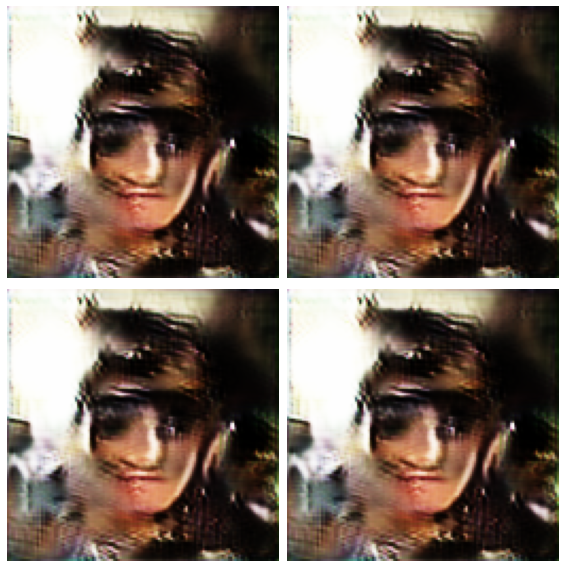

In [4]:
### Generator Model ###
'''
The Generator Model uses the Attribute Data Noise as input
into a Deep Convolutional Network that starts with a small
image and upscales it through each grouping of layers.

In the end it creates a batch of rgb images designed to
trick the Descriminator Model into thinking its a face.

*Note*
The four images below are created from 4 different, random inputs
but look the same. A potential reason for this is that the generator
Model has no incentive to change the image based on the input
since the Descriminator Model is blind to the input.
This could be an important fix for future versions of this.
'''

genImages = dcgan.generator.predict(exampleAttrs)
print("Generated Images Shape: " + str(genImages.shape))
print("Generated Images:")
genImagesDisplay = 0.5 * genImages + 0.5
fig, axs = plt.subplots(2, 2, figsize=(8,8))
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(genImagesDisplay[i * 2 + j])
        axs[i,j].axis('off')
        
plt.tight_layout()
plt.show()

In [5]:
### Discriminator Model ###
'''
The Descriminator Model uses real or fake images as input
into a Deep Convolutional Network which outputs a single value on a scale of 0-1
for each image that represents whether the Model thinks the image contains a
face (a value closer to 0) or no face (a value closer to 1).

This Model is trained half with real images from the CelebA dataset and half
with fake images generated by the current version on the Generator Model and the
corrisponding truth values.
'''

discPrediction = dcgan.discriminator.predict(genImages)
print("Discriminator Predictions Shape: " + str(discPrediction.shape))
print("Discriminator Predictions:\n" + str(discPrediction))

Discriminator Predictions Shape: (4, 1)
Discriminator Predictions:
[[0.8654723 ]
 [0.86726916]
 [0.8737142 ]
 [0.86864424]]


In [6]:
### GAN Model ###
'''
The GAN Model is the combination of the Generator and the Descriminator Models.
An input layer is fed into the Generator which is fed into the Descriminator.
The Attribute Data Noise is used as the input and the output is the predicted
truth values based on the generated image from the Generator being passed into
the Descriminator.

The GAN Model is trained with Attribute Data Noise and fake truth values with
the trainability of the Descriminator model turned off. This means only the
Generator Model is trained. It is trained with fake truth values because it is
the Generator Model's goal to trick the Descriminator Model thus it is good for
the Generator Model when the Descriminator Model gets the answer wrong.
'''

ganOutput = dcgan.combined.predict(exampleAttrs)
print("Fake Truth Values Shape: " + str(truthValue.shape))
print("Fake Truth Values:\n" + str(truthValue))
print("GAN Output Shape: " + str(ganOutput.shape))
print("GAN Output:\n" + str(ganOutput))

Fake Truth Values Shape: (4, 1)
Fake Truth Values:
[[0]
 [0]
 [0]
 [0]]
GAN Output Shape: (4, 1)
GAN Output:
[[0.8654622 ]
 [0.8672767 ]
 [0.87370896]
 [0.86863786]]


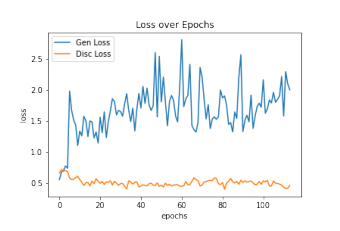

In [7]:
### Training Loss Plot ###
img = mpimg.imread('sampleImgs/mean_lossPlot.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()